# This notebook is made to visualize differential equations
---

## In particular we will focus on second order differential equations

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$

---

### The analysis will be done in the following points:

1. [Visualizing the vecotor field](#Visualizing_the_vecotor_field)
2. [Simulating the trajectories](#Simulating_the_trajectories)
3. [Analyzing non-linear parts of the manifold](#Analyzing_non-linear_parts_of_the_manifold)

---

The differential equation rappresents two populations, one of rabbits and on of sheeps ....

# Visualizing the vecotor field

### Reqiurements installation in quiet mode

In [ ]:
%pip -q install numpy
%pip -q install matplotlib
%pip -q install ipympl

#### Imoprt necessary libraires
> You need to install:`

---

- `jupyter labextension install @jupyter-widgets/jupyterlab-manager` 
- `jupyter labextension install jupyter-matplotlib`
> This will allow you to use the widget and change the parameters real time

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#### Define the differential equation

In [8]:
def eq_diff(x,y,a,b):
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)
    return (u,v)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 100

def update_plot(a=1, b=2, size=0.1, colormap='viridis'):
    # Generate some random data
    x, y = np.meshgrid(np.arange(0, 3.5, size), np.arange(0, 2.5, size))
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
    
    # Create the plot
    fig, ax = plt.subplots()

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v, mag, cmap=colormap)

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    # Set the colorbar ticks and labels
    cbar = plt.colorbar(q)
    cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    
    plt.show()

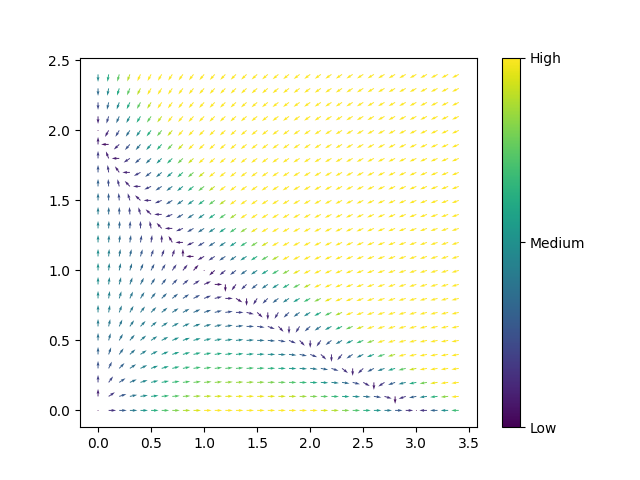

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, step=0.25), FloatSlider(value=2.0, desc…

In [10]:
%matplotlib widget

a_slider = FloatSlider(min=0, max=5, step=0.25, value=1, description='a')
b_slider = FloatSlider(min=0, max=5, step=0.25, value=2, description='b')
size_slider = FloatSlider(min=0.05, max=0.2, step=0.05, value=0.1, description='size')
colormap_dropdown = Dropdown(options=['viridis', 'plasma', 'magma', 'Spectral_r'], value='viridis', description='colormap')

# Create the interactive plot
interactive(update_plot, a=a_slider, b=b_slider, size=size_slider, colormap=colormap_dropdown)

#### Function to create plots

In [11]:
def create_phase_diagrams(a_vals, b_vals, axs = None):    
    # Iterate over the subplots and plot a graph in each one
    for i, ax in enumerate(axs.flat):
        # Set the values of a and b based on the index i
        a = a_vals[i]
        b = b_vals[i]

        # Generate the data for the graph
        x, y = np.meshgrid(np.arange(0, 3.5, 0.1), np.arange(0, 2.5, 0.1))
        
        # unpack the return value
        u,v = eq_diff(x,y,a,b)
        
        # Calculate the magnitude and normalize the vectors
        mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)
        norm = np.sqrt(u**2 + v**2)
        u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
        v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
            
        # Plot the graph using quiver plot
        q = ax.quiver(x, y, u, v, mag, cmap='Spectral_r')
        q.set_clim([mag.min(), mag.max()])
        
        # Add a colorbar to the graph
        cbar = plt.colorbar(q, ax=ax)
        cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
        cbar.set_ticklabels(['Low', 'Medium', 'High'])
        
        # Add a title to the subplot
        ax.set_title(f'Graph values: a={a}, b={b}')

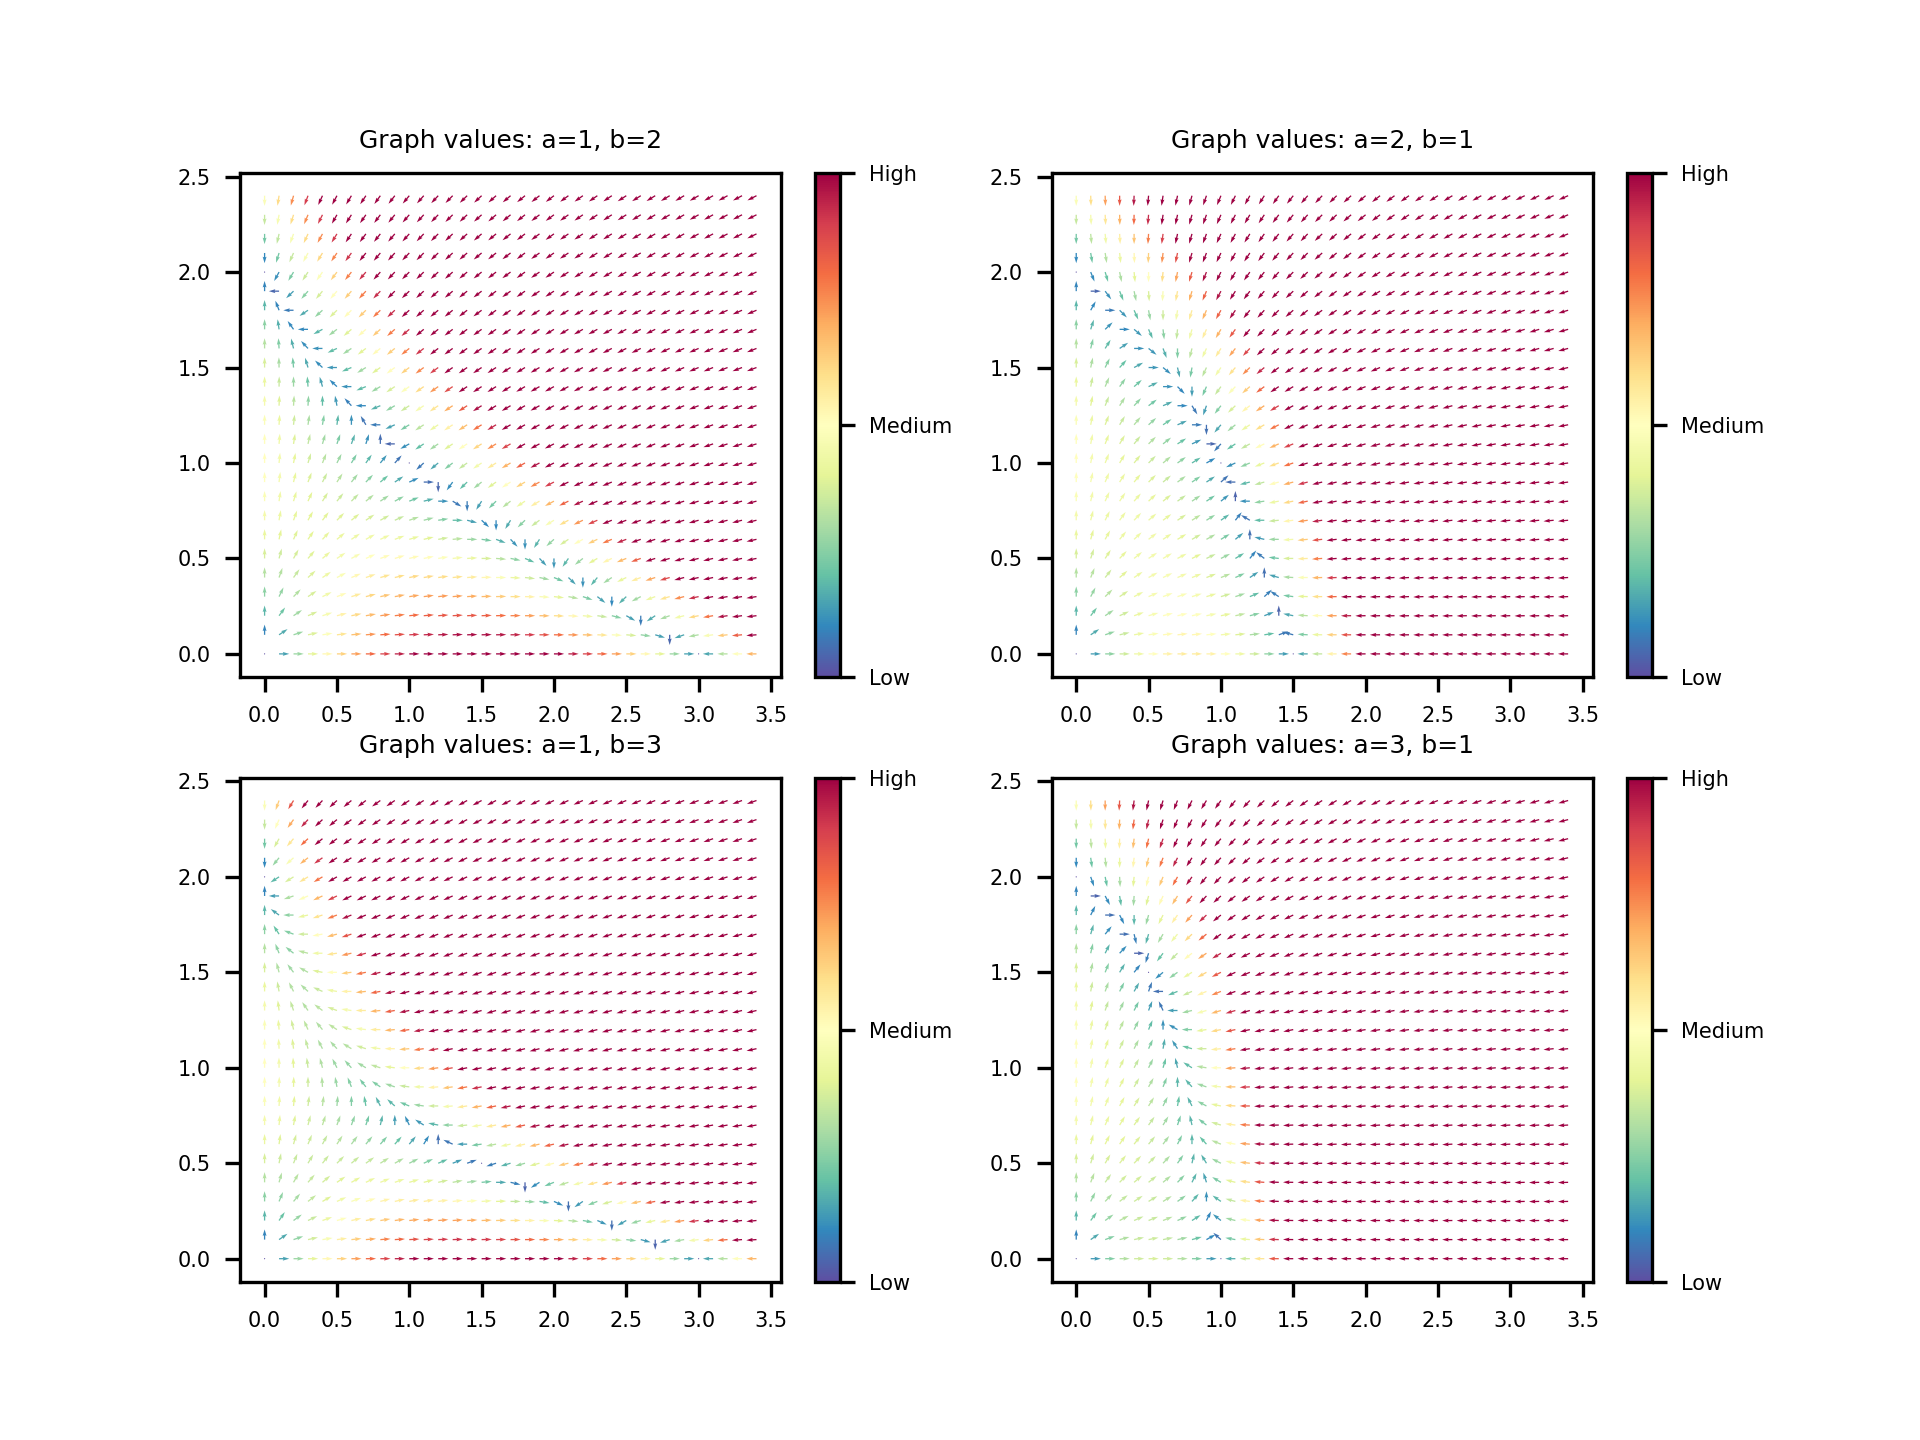

In [6]:
# Visualize the graph and be able to do things like zoom etc...
%matplotlib widget

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300
# Set the font size of the labels and title
plt.rcParams['font.size'] = 5

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

a_vals = [1, 2, 1, 3]
b_vals = [2, 1, 3, 1]

create_phase_diagrams(a_vals,b_vals,axs)

# Display the plot
plt.show()

# Simulating the trajectories

### Lets remember this is our system:

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$


##### Install numba as a requirement to run the jit

In [ ]:
%pip -q install numba

#### Import necessary libraries and define the function

In [7]:
from numba import njit, float64, int32
import numpy as np

# import it from the library directory
from library.eqdiff_solver import *

# remeber that x can be multi dimensional so the function is general to n dimensino
@njit(cache=True)
def f(x) -> np.ndarray[float64]:

    # Define the value for a and b
    a = 1.0
    b = 2.0

    # Define the equations
    u = x[0] * (3 - a * x[0] - b * x[1])
    v = x[1] * (2 - x[0] - x[1])
    return np.array([u, v])

# Ricorda di provare a studiare f-1

# stable manifolds become unstable and viceversa

### Try out the varius methods

Executed 'eulero' in 0.478214 seconds
Executed 'eulero_modified' in 0.131956 seconds


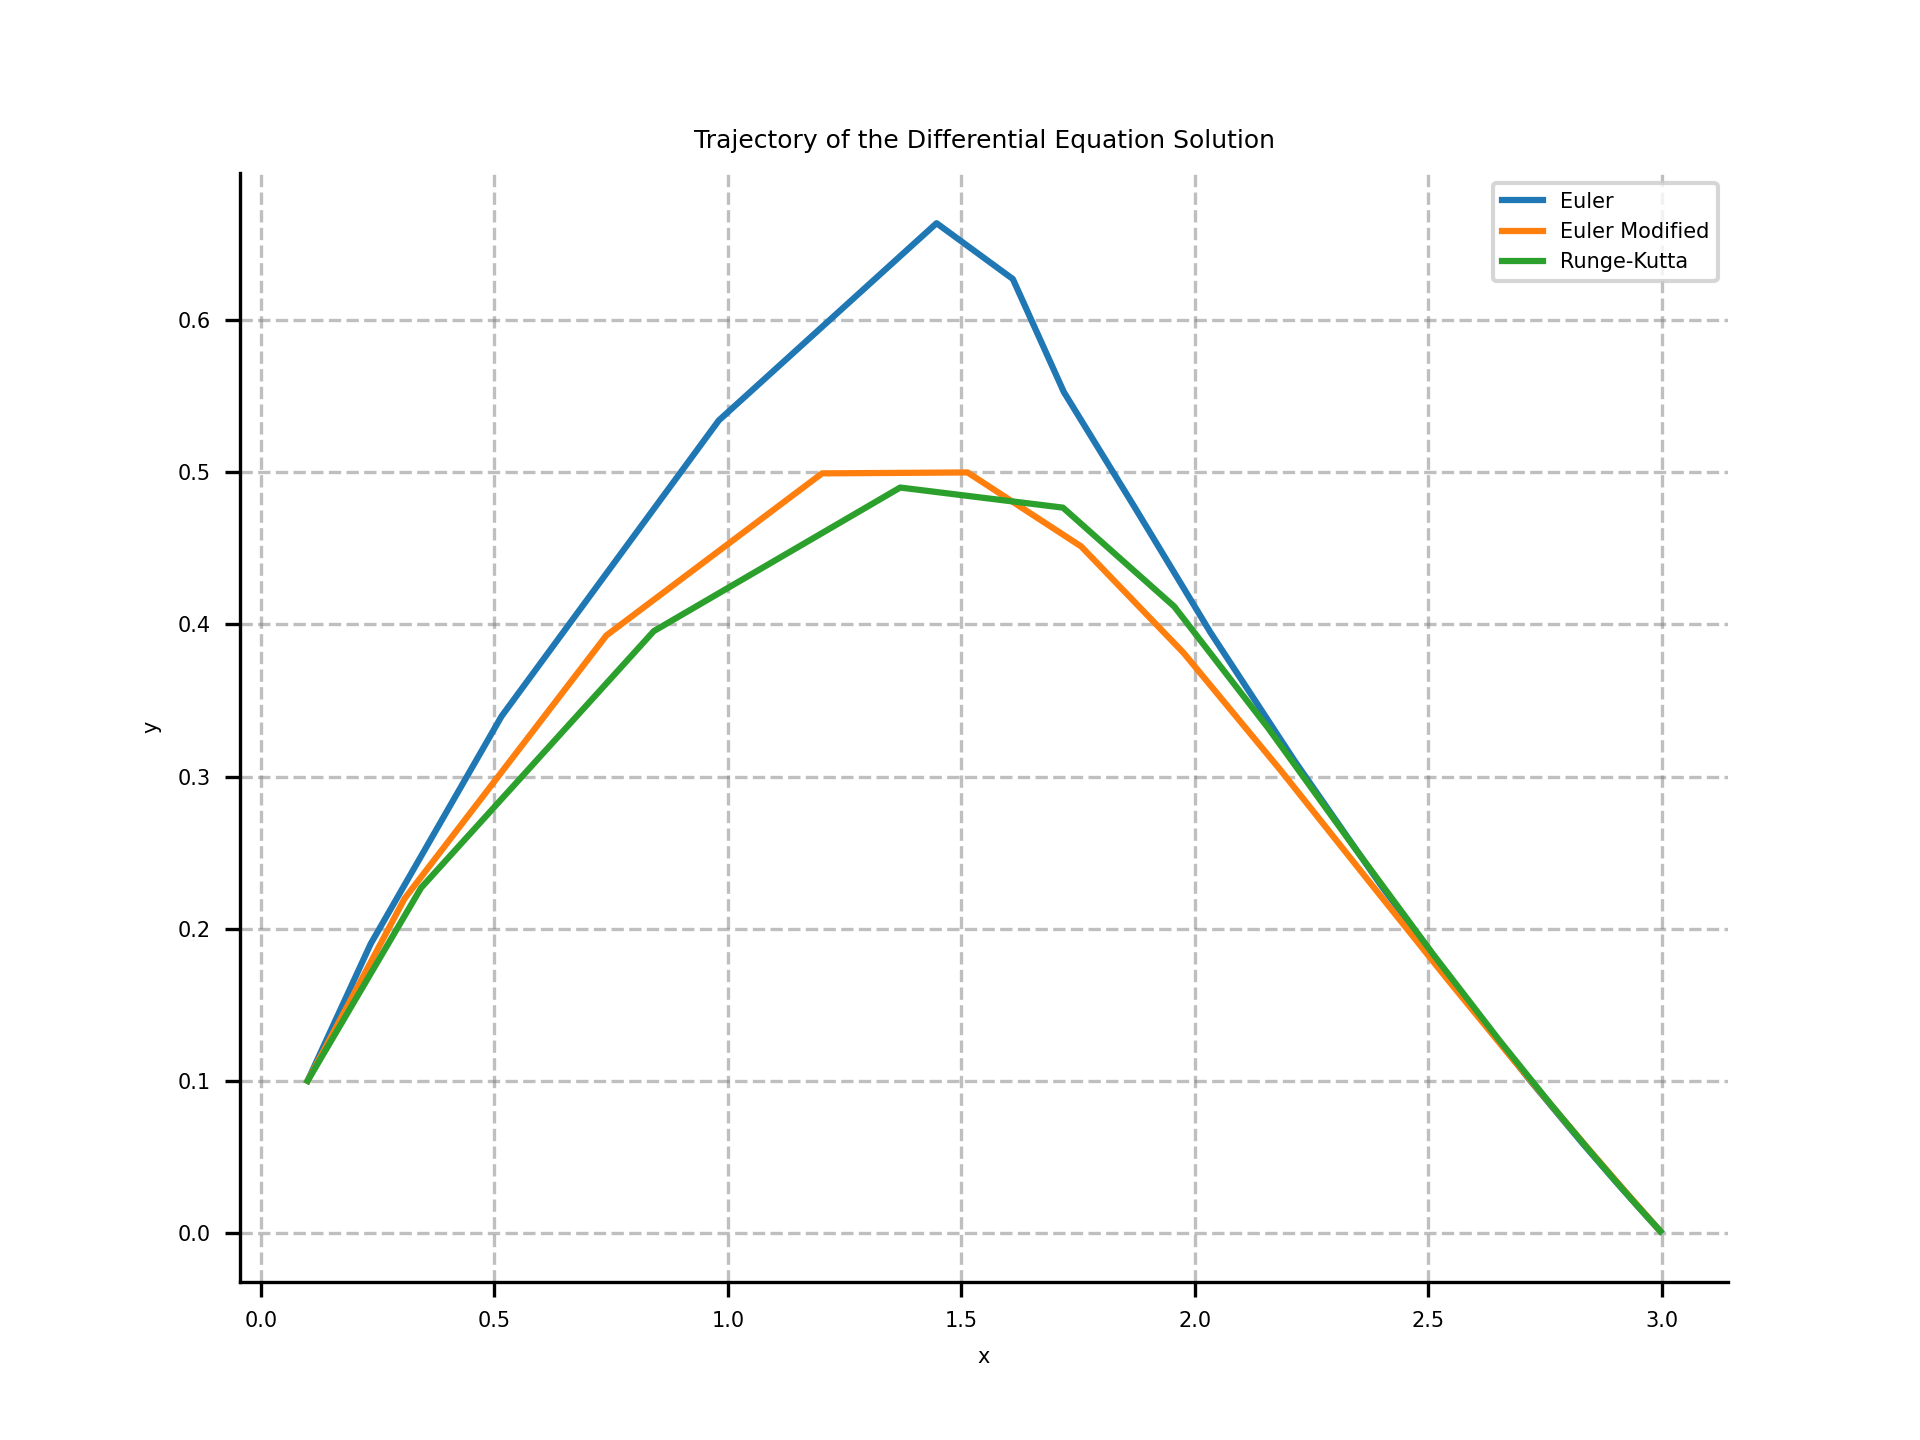

In [8]:
# Initialize an array for the initial contions
x0 = np.array([0.1, 0.1])
# Delta time
dt = 0.5
# Final time
final_time = 10

# The number of step is automatically computed the function is also inside eqdiff_solver
x = plot_solution(f, x0, dt=dt, final_time=final_time, rk_only= False)

## Analyzing non-linear parts of the manifold

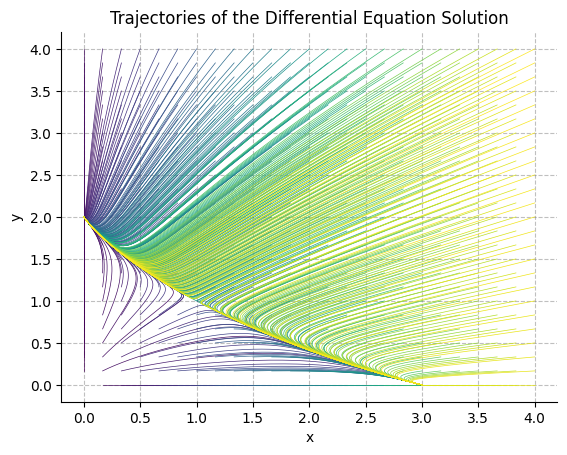

Executed 'plot_phase_diagram_solutions' in 0.429398 seconds


In [17]:
# Delta time
dt = 0.01

# Final time
final_time = 10

# studiarlo con dt negativo e final_time negativo anche

# The number of step is automatically computed the function is also inside eqdiff_solver
plot_phase_diagram_solutions(f, dt=dt, final_time=final_time, num=25)

# Close all open figures
plt.close('all')

### Testing

In [ ]:
%matplotlib widget

# Create sliders for dt, final_time, and num
dt_slider = FloatSlider(min=0.01, max=1, step=0.01, value=0.1, description="dt")
final_time_slider = FloatSlider(min=0.1, max=10, step=0.1, value=1, description="Final Time")
num_slider = IntSlider(min=1, max=50, step=1, value=20, description="Num")

# Use interact to create an interactive plot with the sliders
interact(plot_phase_diagram_solutions, f=f, dt=dt_slider, final_time=final_time_slider, num=num_slider)

### Lets remember this is our system

##### The inverse of the system we had is
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = \frac{3 - by}{2a} \pm \frac{\sqrt{\left(by - 3\right)^2 - 4ax}}{2a}\\
    \dot{y} = \frac{(-x + 2 y - y^2)}{y}
\end{cases}
$$


Executed 'eulero' in 0.181927 seconds
Executed 'eulero_modified' in 0.128531 seconds


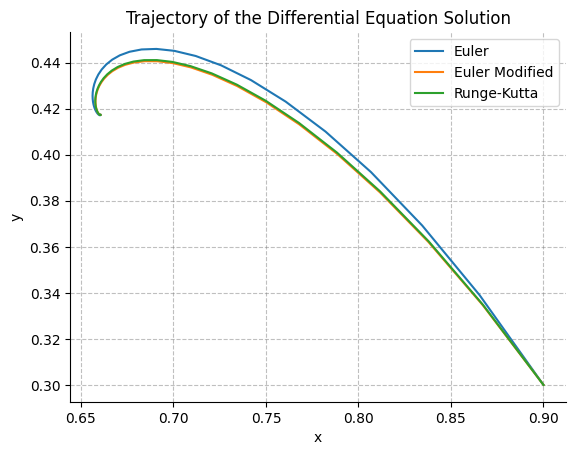

In [32]:
# g = f^-1
@njit(cache=True)
def g(x) -> np.ndarray[float64]:

    # Define the value for a and b
    a = 1.0
    b = 2.0

    # Define the equations
    u = x[0] * (3 - b * x[1])/(2*a) - np.sqrt((b*x[1] - 3)**2 - 4 * a * x[0])/2*a
    v = x[1] * (-x[0] + 2 * x[1] - x[1]**2)/x[1]
    return np.array([u, v])

x0 = np.array([0.9, 0.3])

# Delta time
dt = -0.1

# Final time
final_time = -10

x = plot_solution(g, x0, dt=dt, final_time=final_time, rk_only= False)
# The number of step is automatically computed the function is also inside eqdiff_solver
# plot_phase_diagram_solutions(g, dt=dt, final_time=final_time, num=25)

# Close all open figures
#plt.close('all')
x